In [1]:
import numpy as np

In [2]:
corpus=['Una pizza per portare via', 'Porto via il civo','Preferirei mangire qualcosa a casa']
corpus_words_unique = set()
corpus_processed_docs = []
for doc in corpus:
    corpus_words_ = []
    corpus_words = doc.split()
    print(corpus_words)
    for x in corpus_words:
        if len(x.split('.')) == 2:
            corpus_words_ += [x.split('.')[0]] + ['.']
        else:
            corpus_words_ += x.split('.')
    corpus_processed_docs.append(corpus_words_)
    corpus_words_unique.update(corpus_words_)

['Una', 'pizza', 'per', 'portare', 'via']
['Porto', 'via', 'il', 'civo']
['Preferirei', 'mangire', 'qualcosa', 'a', 'casa']


In [3]:
corpus_words_unique = np.array(list(corpus_words_unique))
co_occurence_matrix = np.zeros((len(corpus_words_unique),len(corpus_words_unique)))
for corpus_words_ in corpus_processed_docs:
    for i in range(1,len(corpus_words_)):
        index_1 = np.argwhere(corpus_words_unique == corpus_words_[i])
        index_2 = np.argwhere(corpus_words_unique == corpus_words_[i-1])
        print("sono indece_1 ",index_1)
        print("sono indece_2 ",index_2)
        co_occurence_matrix[index_1, index_2] += 1
        co_occurence_matrix[index_2, index_1] += 1
        print("sono co_occurence_matrix ",co_occurence_matrix)

sono indece_1  [[12]]
sono indece_2  [[11]]
sono co_occurence_matrix  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
sono indece_1  [[1]]
sono indece_2  [[12]]
sono co_occurence_matrix  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 

co_occurence_matrix follows
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


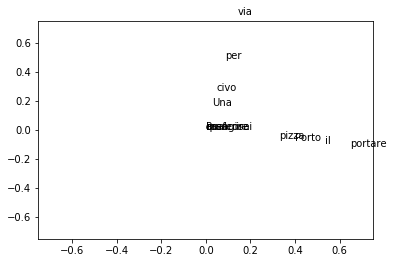

In [5]:
U,S,V = np.linalg.svd(co_occurence_matrix,full_matrices=False)
print("co_occurence_matrix follows")
print(co_occurence_matrix)
import matplotlib.pyplot as plt
for i in range(len(corpus_words_unique)):
    plt.text(U[i,0],U[i,1], corpus_words_unique[i])
plt.xlim((-0.75,0.75))
plt.ylim((-0.75,0.75))
plt.show()

array([[ 7.77156117e-16,  6.55495991e-01, -3.33644647e-16,
         1.58481208e-15,  1.65445465e-01, -3.17151714e-02,
        -1.76635402e-16, -5.88784672e-17,  5.41322019e-01,
        -3.00379002e-02, -4.85026078e-01, -1.12981644e-01,
         1.57009246e-16],
       [-1.68457870e-01,  2.83211074e-16, -5.74096057e-17,
        -3.67239188e-16,  1.02070219e-01,  5.32459834e-01,
         3.88582843e-17,  1.66115460e-17,  2.75921399e-02,
         4.97246239e-01,  1.48709538e-01, -6.38404626e-01,
         1.75541673e-17],
       [ 0.00000000e+00, -1.40506439e-16, -3.82814881e-01,
        -1.41842989e-01,  5.27355937e-16, -1.11022302e-16,
         3.70317432e-01,  6.02382769e-01,  3.26995375e-16,
         7.58941521e-17, -4.16333634e-16,  1.11022302e-16,
        -5.77350269e-01],
       [ 0.00000000e+00, -7.89884868e-16, -2.45679264e-01,
         6.63054824e-01,  1.97064587e-15, -4.44089210e-16,
         6.02382769e-01, -3.70317432e-01, -2.15105711e-16,
         0.00000000e+00,  1.30451205e

In [12]:
corpus_words_unique

array(['portare', 'Una', 'Preferirei', 'a', 'qualcosa', 'pizza', 'casa',
       'per', 'Porto', 'mangire', 'civo', 'via', 'il'], dtype='<U10')

In [20]:
corpus_processed_docs[2]

['Preferirei', 'mangire', 'qualcosa', 'a', 'casa']

In [23]:
corpus_words_

['Preferirei', 'mangire', 'qualcosa', 'a', 'casa']